# Exploratory Data Analysis **(EDA)** & Pre-processing steps

## `AZIDAS` dataset:  Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).

This notebook performs Exploratory Data Analysis and pre-processing (data standarization and cleaning) of the `AZIDAS` dataset containing demographics for the general population of Germany.

# 00. Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm    
%matplotlib inline


### my utils

from eda_utils import *

---

# 01. Import dataset
We know that the separator is a semicolon (;), and the first row contains the column names. Also, one of the columns 'LNR' is really the `ID` number, and should not be considered a standard "feature". 

In [2]:
#plot raw header to inspect dataset
!head -n 2 ../arvato_data/Udacity_AZDIAS_052018.csv

LNR;AGER_TYP;AKT_DAT_KL;ALTER_HH;ALTER_KIND1;ALTER_KIND2;ALTER_KIND3;ALTER_KIND4;ALTERSKATEGORIE_FEIN;ANZ_HAUSHALTE_AKTIV;ANZ_HH_TITEL;ANZ_KINDER;ANZ_PERSONEN;ANZ_STATISTISCHE_HAUSHALTE;ANZ_TITEL;ARBEIT;BALLRAUM;CAMEO_DEU_2015;CAMEO_DEUG_2015;CAMEO_INTL_2015;CJT_GESAMTTYP;CJT_KATALOGNUTZER;CJT_TYP_1;CJT_TYP_2;CJT_TYP_3;CJT_TYP_4;CJT_TYP_5;CJT_TYP_6;D19_BANKEN_ANZ_12;D19_BANKEN_ANZ_24;D19_BANKEN_DATUM;D19_BANKEN_DIREKT;D19_BANKEN_GROSS;D19_BANKEN_LOKAL;D19_BANKEN_OFFLINE_DATUM;D19_BANKEN_ONLINE_DATUM;D19_BANKEN_ONLINE_QUOTE_12;D19_BANKEN_REST;D19_BEKLEIDUNG_GEH;D19_BEKLEIDUNG_REST;D19_BILDUNG;D19_BIO_OEKO;D19_BUCH_CD;D19_DIGIT_SERV;D19_DROGERIEARTIKEL;D19_ENERGIE;D19_FREIZEIT;D19_GARTEN;D19_GESAMT_ANZ_12;D19_GESAMT_ANZ_24;D19_GESAMT_DATUM;D19_GESAMT_OFFLINE_DATUM;D19_GESAMT_ONLINE_DATUM;D19_GESAMT_ONLINE_QUOTE_12;D19_HANDWERK;D19_HAUS_DEKO;D19_KINDERARTIKEL;D19_KONSUMTYP;D19_KONSUMTYP_MAX;D19_KOSMETIK;D19_LEBENSMITTEL;D19_LETZTER_KAUF_BRANCHE;D19_LOTTO;D19_NAHRUNGSERGAENZUNG;D19_RATGEBE

I have a machine with 32GB of `RAM`, so the dataset can be loaded and pre-processed in memory. Hence `low_memory = False`, allows for faster loads and better column type inference.

In [3]:
%%time
azdias = pd.read_csv('../arvato_data/Udacity_AZDIAS_052018.csv', sep=';', low_memory = False, index_col = 'LNR') 
azdias

CPU times: user 49.7 s, sys: 4.74 s, total: 54.4 s
Wall time: 54.4 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,0.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,0.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,0.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825761,-1,5.0,17.0,NaN,NaN,NaN,NaN,17.0,15.0,0.0,...,2.0,4.0,7.0,8.0,3.0,4.0,3.0,4,2,3
825771,-1,9.0,16.0,NaN,NaN,NaN,NaN,16.0,11.0,0.0,...,4.0,6.0,9.0,6.0,6.0,9.0,5.0,6,1,2
825772,-1,1.0,17.0,NaN,NaN,NaN,NaN,17.0,3.0,0.0,...,2.0,7.0,10.0,8.0,NaN,5.0,7.0,4,2,2


---

# 02. Basic data characteristics

## 02. 01. Empty cells

Before exploring the values contained in the cells, it is essential to understand how many missing values are present. I.e. values that were **not entered**, now "unknown" from the perspective of the data curator, the latter will come later.

CPU times: user 1.08 s, sys: 300 ms, total: 1.38 s
Wall time: 1.38 s


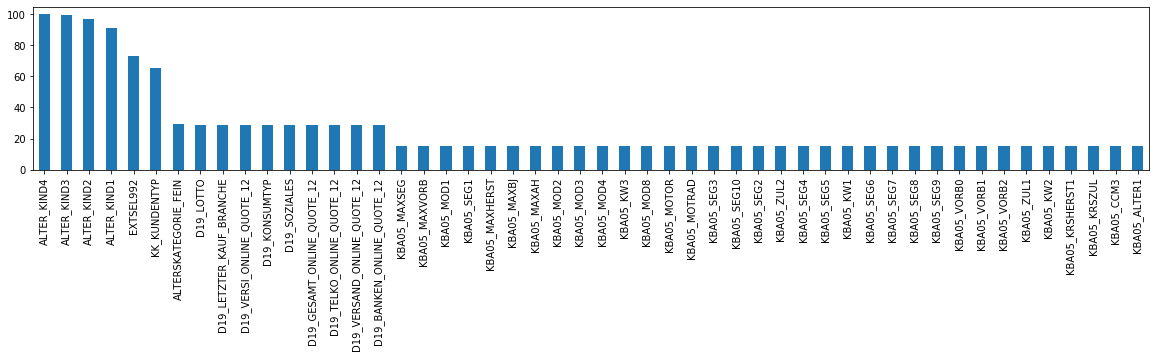

In [4]:
%%time
empty_cells = pd.isnull(azdias).sum()*100.0/azdias.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

(Above) a barplot showing 50 most missing features, ordered by the percentage of missing values.

(Below) Histogram showing that most features have `NAs` less than 20% of the time:

[]

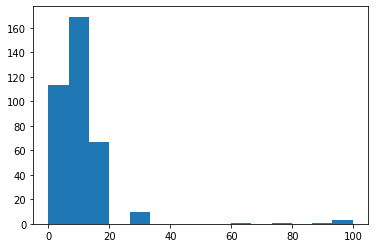

In [5]:
plt.hist(empty_cells,bins=15)
plt.plot()

For subsequent steps in pre-processing, I will be establishing a cutoff threshold for a feature removal: called `missingness_threshold_percentage`. 
> If a feature is missing more or equal to `missingness_threshold_percentage`% of its entries, I am removing that feature from subsequent analysis. Since the data is describing general population, and high values of missingness might introduce a lot of spuriousness to the analysis. 


In [6]:
missingness_threshold_percentage=30

In [7]:
np.sum(empty_cells>=missingness_threshold_percentage)

6

For now, with 30% cut-off threshold I would remove **6 features**. But I will postpose this step for now to identify other entries annotated as "missing/unknown".

## 02.02. Undefined entries
I am utilizing provided matadata file `DIAS Attributes - Values 2017.xlsx` to extract the possible value types for defined features (columns in `azidas` dataset).

Due to the specific formatting, a forward-fill function is applied `ffill`. 

Upon manual inspection, the values for "unknown" are sometimes encoded as -1, sometimes as 0 or 9, and sometimes as both -1,9 or 0. But there are features in which for example 0 does not mean unknown. And there are features marked with string `...` indicating a **float values**, as opposed to a categorical one.

In this step, I am going to count number of "unknown" entries per feature. The idea is that "missing entries" (point 02.01) and unknown entries "02.02" might have different sources, but inevitabely lead to the same conclusions for the sake of the analysis -> unavailable data.

I am going to use the keyword "unknown" to match the values in the column "meaning", to extract a dataframe of attributes and its values defining unknown entries:

And now I will change values in loaded dataset: `azdias` that match the missing values in specified attributes to `NANs`:

In [108]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
azdias,missing_metadata_annotations,not_present_features = unknown_to_nan(azdias, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

ValueError: too many values to unpack (expected 3)

In [93]:
print("{} dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations), len(not_present_features) ) )

93 dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


## 02.03. Features renaming [intro]
To investigate, let's take **for example** features that have "D19" in their name from both dataset and metadata information:

In [78]:
[x for x in  not_present_features if "D19" in x]

['D19_BANKEN_GROSS_RZ',
 'D19_FREIZEIT_RZ',
 'D19_WEIN_FEINKOST_RZ',
 'D19_VOLLSORTIMENT_RZ',
 'D19_NAHRUNGSERGAENZUNG_RZ',
 'D19_GARTEN_RZ',
 'D19_KINDERARTIKEL_RZ',
 'D19_BEKLEIDUNG_GEH_RZ',
 'D19_BANKEN_REST_RZ',
 'D19_KOSMETIK_RZ',
 'D19_TECHNIK_RZ',
 'D19_BUCH_RZ',
 'D19_DROGERIEARTIKEL_RZ',
 'D19_BIO_OEKO_RZ',
 'D19_ENERGIE_RZ',
 'D19_HAUS_DEKO_RZ',
 'D19_DIGIT_SERV_RZ',
 'D19_BANKEN_LOKAL_RZ',
 'D19_RATGEBER_RZ',
 'D19_TELKO_REST_RZ',
 'D19_VERSAND_REST_RZ',
 'D19_HANDWERK_RZ',
 'D19_BEKLEIDUNG_REST_RZ',
 'D19_KK_KUNDENTYP',
 'D19_SAMMELARTIKEL_RZ',
 'D19_TIERARTIKEL_RZ',
 'D19_SONSTIGE_RZ',
 'D19_LOTTO_RZ',
 'D19_BANKEN_DIREKT_RZ',
 'D19_LEBENSMITTEL_RZ',
 'D19_REISEN_RZ',
 'D19_SCHUHE_RZ',
 'D19_VERSICHERUNGEN_RZ',
 'D19_TELKO_MOBILE_RZ',
 'D19_BILDUNG_RZ']

In [77]:
[x for x in  missing_metadata_annotations if "D19" in x]

['D19_BEKLEIDUNG_GEH',
 'D19_GARTEN',
 'D19_WEIN_FEINKOST',
 'D19_BANKEN_GROSS',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_SAMMELARTIKEL',
 'D19_LOTTO',
 'D19_TELKO_ONLINE_QUOTE_12',
 'D19_TELKO_REST',
 'D19_RATGEBER',
 'D19_BILDUNG',
 'D19_BANKEN_DIREKT',
 'D19_SONSTIGE',
 'D19_ENERGIE',
 'D19_BANKEN_REST',
 'D19_VERSI_ONLINE_QUOTE_12',
 'D19_KINDERARTIKEL',
 'D19_VERSI_OFFLINE_DATUM',
 'D19_VOLLSORTIMENT',
 'D19_LEBENSMITTEL',
 'D19_KOSMETIK',
 'D19_TELKO_MOBILE',
 'D19_VERSICHERUNGEN',
 'D19_FREIZEIT',
 'D19_BIO_OEKO',
 'D19_TECHNIK',
 'D19_HANDWERK',
 'D19_VERSI_DATUM',
 'D19_SOZIALES',
 'D19_HAUS_DEKO',
 'D19_NAHRUNGSERGAENZUNG',
 'D19_TIERARTIKEL',
 'D19_LETZTER_KAUF_BRANCHE',
 'D19_KONSUMTYP_MAX',
 'D19_BANKEN_LOKAL',
 'D19_VERSI_ONLINE_DATUM',
 'D19_BEKLEIDUNG_REST',
 'D19_SCHUHE',
 'D19_REISEN',
 'D19_VERSAND_REST']

In [91]:
azdias['D19_BANKEN_DIREKT']

LNR
910215    0
910220    0
910225    0
910226    0
910241    1
         ..
825761    0
825771    0
825772    6
825776    0
825787    0
Name: D19_BANKEN_DIREKT, Length: 891221, dtype: int64

It seems that there are examples, like:

- `D19_TELKO_MOBILE` (present in `AZIDAS` dataset), but lacking metadata entry, however the `D19_TELKO_MOBILE_RZ` is defined in metadata.

- `D19_BANKEN_GROSS` in the dataset, and `D19_BANKEN_GROSS_RZ` in metadata

for this particular example, it is perhaps worth assuming that these features refer to the same concept. 

It is particularly important to reduce the number of data fields that lack metadata information, as we need to define a concept of missingness. For example `D19_TELKO_MOBILE_RZ` in provided metadata file defines the fields as: "transactional activity based on the product group MOBILE COMMUNICATION", and is described by several categories:

```
0	no transaction known
1	Multibuyer 0-12 months
2	Doublebuyer 0-12 months
3	Singlebuyer 0-12 months
4	Multi-/Doublebuyer 13-24 months
5	Singlebuyer 13-24 months
6	Buyer > 24 months
7	Prospects > 24 months
```

We might wonder what this `0` means really - this would be a question to the data curator. 


If 0 label (no known transation) is interpreted as a lack of knowledge, i.e. missing value, then this value **in reality** could be really one of the 1-7 classes. Thus 0 would be associated with uncertainity, i.e. missing value. Then we can either drop it, or try to impute it based on other features. But if we're certain that it indicates no transations, then it is a valid category in itself. 

One thing is that `D19_TELKO_MOBILE` feature does not hold any `NAs` values in the loaded dataframe:

In [86]:
np.sum(np.isnan(azdias['D19_TELKO_MOBILE']))

0

In [44]:
np.unique(azdias['ALTER_KIND1'].dropna())

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18.])

As we see in the cell output above there are a couple of non-common features between the dataset and the provided metadata, namely
1. There are **93** feature names defined in the provided dataset that lack the exact definition in provided metadata.

2. There are 8 entries in the metadata, that were not provided for the dataset.

Whereas the (2) point is not that important (there might have been more features described, but they didn't make it to the final dataset for some reason) the first step requires some attention. If we're missing annotations for 93 features, then we're missing a source of the "unknown/undefined/NA", that could help us standardize the unknown tokens in the dataset.

Let's take as an example feature `D19_TELKO_MOBILE` defined in `AZDIAS` dataset, but not present exactly in the metadata file `DIAS Attributes - Values 2017.xlsx`. There I find a field `D19_TELKO_MOBILE_RZ` that seems to correspond to that field.

In [9]:
np.unique((azdias['VERDICHTUNGSRAUM']).dropna())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45.])

In [10]:
sum((azdias['AKT_DAT_KL']).isna()*100)/azdias.shape[0]

8.247000463409188

CPU times: user 1.83 s, sys: 1.47 s, total: 3.3 s
Wall time: 3.3 s


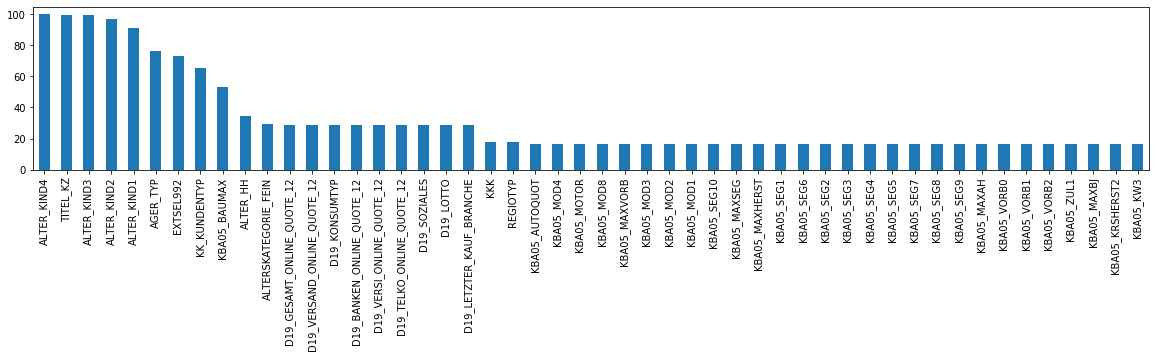

In [11]:
%%time
empty_cells = pd.isnull(azdias).sum()*100.0/azdias.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

[]

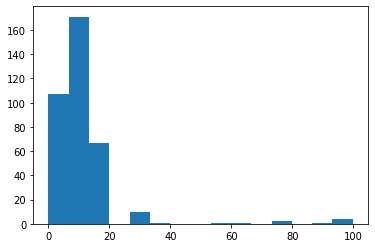

In [12]:
plt.hist(empty_cells,bins=15)
plt.plot()

In [13]:
np.sum(empty_cells>missingness_threshold_percentage)

10

We see that with inclusion of "unknown" data labels as not available, we obtain 7 features that exceed the arbitrary `missingness_threshold_percentage` I set to 30%, i.e. one more if I didn't standardize the m

Moreover, all the missing/unavailable/unknown entries are now jointly encoded as a `NaN` (**standarization step**).

---

## 02.03. Missingness filtering

After identifying number of empty cells (`NaNs`, and convering unknown values to `NaNs` I'll filter (remove) features that exhibit missingnes above `missingness_threshold_percentage`